# Funciones de distribución de probabilidad

## Distribución Uniforme
Todos tienen la misma probabilidad dentro de la distribución. <B>EQUIPROBABLES!</B>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = 1        # Número de inicio del rango
b = 100      # Número de fin del rango
n = 1000000  # Número de muestras que se generarán
data = np.random.uniform(a,b,n)    # Con UNIFORM de numpy se genera con distro uniforme. 

(array([ 99751., 100006., 100035.,  99420., 100591., 100288., 100038.,
         99980.,  99613., 100278.]),
 array([ 1.00004714, 10.90003515, 20.80002316, 30.70001117, 40.59999918,
        50.49998719, 60.3999752 , 70.2999632 , 80.19995121, 90.09993922,
        99.99992723]),
 <a list of 10 Patch objects>)

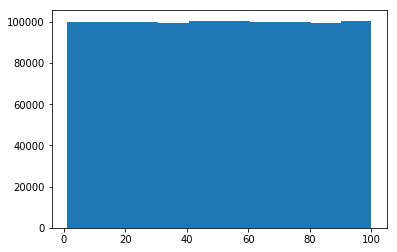

In [6]:
%matplotlib inline
plt.hist(data)

# Se puede observar que para cada número, existe casi una misma probabidad de generarse que es 100/1000000
# Según la teoría el gŕafico es un rectángulo. 

## Distribución NORMAL (Campana de Gauss)

Los parámetros que definen a una distro normal son la MEDIA y la DESVIACIÓN ESTÁNDAR. La gráfica es mucho más diciente. 

* Está la normal estándar donde la media da en 0 y la desviación crece por unidad.
* Otra normal donde la media no es en cero y la desviación no es uno. 


In [8]:
data = np.random.randn(1000000) # RANDN es la función de numpy para generar bajo la distro Normal OJO, ESTANDAR

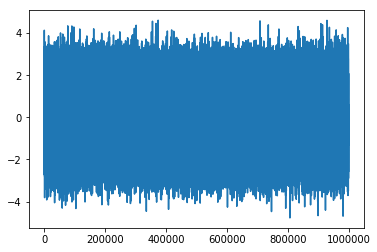

In [9]:
x = range(1, 1000001)
plt.plot(x, data)

(array([6.70000e+01, 1.84400e+03, 2.32090e+04, 1.29169e+05, 3.13870e+05,
        3.36379e+05, 1.59249e+05, 3.31330e+04, 2.97500e+03, 1.05000e+02]),
 array([-4.77581364, -3.83702375, -2.89823385, -1.95944395, -1.02065405,
        -0.08186415,  0.85692574,  1.79571564,  2.73450554,  3.67329544,
         4.61208533]),
 <a list of 10 Patch objects>)

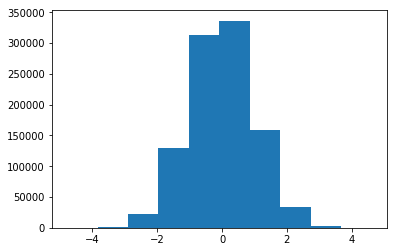

In [10]:
%matplotlib inline
plt.hist(data)  # Realizando el histograma se puede ver a groso modo la intención de la distro. 

Pero también se puede ver a través de la función de distribución acumulada. (Una S acostada para Gauss)
Esto se logra dibujando los datos ordenados de la siguiente manera: 


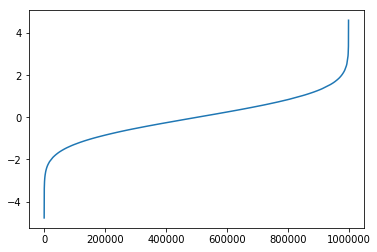

In [11]:
plt.plot(x, sorted(data))

(array([   8.,   82.,  450., 1427., 2647., 2824., 1754.,  657.,  135.,
          16.]),
 array([-4.16911119, -2.28778429, -0.40645739,  1.47486951,  3.35619641,
         5.23752331,  7.11885021,  9.00017711, 10.88150401, 12.76283091,
        14.64415781]),
 <a list of 10 Patch objects>)

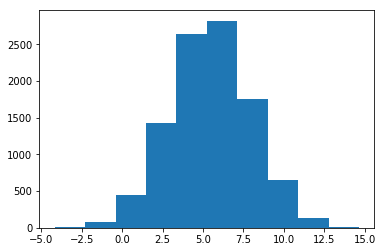

In [14]:
# para generar una distribución Normal NO estandar es de la siguiente manera: 

media = 5.5  # Basándonos en el ejemplo de las notas de una clase
desviacion_estandar =  2.5 

data= 5.5 + 2.5*np.random.randn(10000) # SE HACE DE ESTA MANERA!  y sale de  Z = (X-m)/sd  -> N(0,1) 
# despejando a X, entonces X = m + sd * Z 

plt.hist(data)  #verificar que la media es 5.5

In [15]:
# usando esto se pueden generar data frames aleatorios bajo una distribución de la siguiente manera: 
data = np.random.randn(2,4)  # 2 array de tamaño 4 con distro NORMAL. 
data

array([[ 1.51389147,  0.04549135,  1.28306589,  0.06967763],
       [ 0.01984018,  1.09139787, -0.34273619,  0.08417095]])